### Import relevant libraries

In [13]:
from semopy import Model, calc_stats, semplot
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import pandas as pd
import numpy as np
import seaborn as sns
from semopy.inspector import inspect

### Import the dataset

In [14]:
df = pd.read_csv("Welzijnsmonitor2025_scaled_normalised_UTF8.csv", sep=";")

### Creating the model

In [ ]:
model_desc = """
# measurement model

Wellbeing =~ Bevl_1 + Bevl_2 + Bevl_3 + Cogn_Eng1_5 + Cogn_Eng1_6 + Cogn_Eng2_2 + Cogn_Eng2_3 + Cogn_Eng2_8 + Mot_Stress_1 + Mot_Stress_4
Interventions =~ Bekendgebruik_4 + Bekendgebruik_5 + Bekendgebruik_6 + Bekendgebruik_7
Negative_Outcomes =~ StopInt + Vertr
Positive_Outcomes =~ Cijfer_huidig_1 + Stopint2
Stressors =~ Onnodige_stress_1 + Onnodige_stress_2 + Onnodige_stress_3 + Onnodige_stress_4 + Onnodige_stress_5 + Onnodige_stress_6 + Onnodige_stress_7 + Onnodige_stress_8 + Onnodige_stress_9
Response_to_Stress =~ Burn1_1 + Burn1_2 + Burn1_3 + Burn1_4 + Depr_1 + Depr_2 + Depr_3 + Depr_4 + Depr_5 + Depr_6 + Depr_7 + Depr_8 + Mot_Stress_2

Participation =~ Partici1_1 + Partici1_2 + Partici1_3 + Partici1_4
Behavior =~ Cogn_Eng1_1 + Cogn_Eng1_2 + Cogn_Eng1_4 + Cogn_Eng2_1 + Cogn_Eng2_4 + Cogn_Eng2_5 + Cogn_Eng2_6 + Cogn_Eng2_7

# Covariances (two-headed arrows in the diagram)
Response_to_Stress ~~ Wellbeing
Stressors ~~ Participation

# Regressions
Participation ~ Interventions + Behavior
Response_to_Stress ~ Stressors + Participation
Wellbeing ~ Stressors + Participation

Negative_Outcomes ~ Response_to_Stress + Wellbeing
Positive_Outcomes ~ Wellbeing + Response_to_Stress
"""

In [16]:
model = Model(model_desc)
model.fit(df)

df_imputed = model.predict(df)
latent_scores = model.predict_factors(df_imputed)

# Export the model with the new latent variables and their descriptive statistics

In [17]:
latent_scores.to_csv("latent_variable_scores.csv", index=False)
latent_scores.describe()

,Behavior,Negative_Outcomes,Participation,Positive_Outcomes,Response_to_Stress,Stressors,Wellbeing
count,1.512000e+03,1.512000e+03,1.512000e+03,1.512000e+03,1.512000e+03,1.512000e+03,1.512000e+03
mean,5.169292e-17,-5.286776e-17,3.759485e-16,-7.636455e-18,-2.349678e-17,5.404260e-17,-3.829976e-16
std,2.459730e-01,2.677567e-01,6.473956e-01,9.231331e-02,5.930776e-01,6.118579e-01,4.963441e-01
min,-1.041066e+00,-6.234222e-01,-1.456136e+00,-3.677165e-01,-1.472552e+00,-2.112291e+00,-1.982188e+00
25%,-1.601694e-01,-1.932298e-01,-4.731807e-01,-4.799460e-02,-4.460174e-01,-4.233442e-01,-2.571190e-01
50%,8.367002e-03,-5.426764e-02,-8.904320e-02,1.444104e-02,-4.570276e-02,2.324835e-02,7.800561e-02
75%,1.576290e-01,1.425766e-01,3.963504e-01,6.067180e-02,3.886627e-01,4.412932e-01,3.262924e-01
max,7.964478e-01,1.123838e+00,2.174330e+00,2.300699e-01,2.096750e+00,1.516486e+00,1.241272e+00


In [18]:
latents = set(model.vars['latent'])
observeds = set(model.vars['observed'])

est = model.inspect(std_est=True)

# Factor loadings = observed ~ latent
loadings = est[
    (est['op'] == '~') &
    (est['lval'].isin(observeds)) &
    (est['rval'].isin(latents))
]

print("Factor loadings:")
display(loadings)

Factor loadings:


,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
9,Bevl_1,~,Wellbeing,1.000000,0.652597,-,-,-
10,Bevl_2,~,Wellbeing,1.158444,0.795356,0.043925,26.373148,0.0
11,Bevl_3,~,Wellbeing,1.085685,0.681060,0.046724,23.235927,0.0
12,Cogn_Eng1_5,~,Wellbeing,1.211494,0.716840,0.049956,24.25135,0.0
13,Cogn_Eng1_6,~,Wellbeing,0.966323,0.579923,0.047786,20.221901,0.0
14,Cogn_Eng2_2,~,Wellbeing,0.770467,0.414469,0.051773,14.881538,0.0
15,Cogn_Eng2_3,~,Wellbeing,0.646193,0.369802,0.048356,13.363352,0.0
16,Cogn_Eng2_8,~,Wellbeing,0.743592,0.452402,0.046052,16.146916,0.0
17,Mot_Stress_1,~,Wellbeing,1.165625,0.756782,0.04598,25.350463,0.0
18,Mot_Stress_4,~,Wellbeing,1.232160,0.836431,0.044955,27.408867,0.0


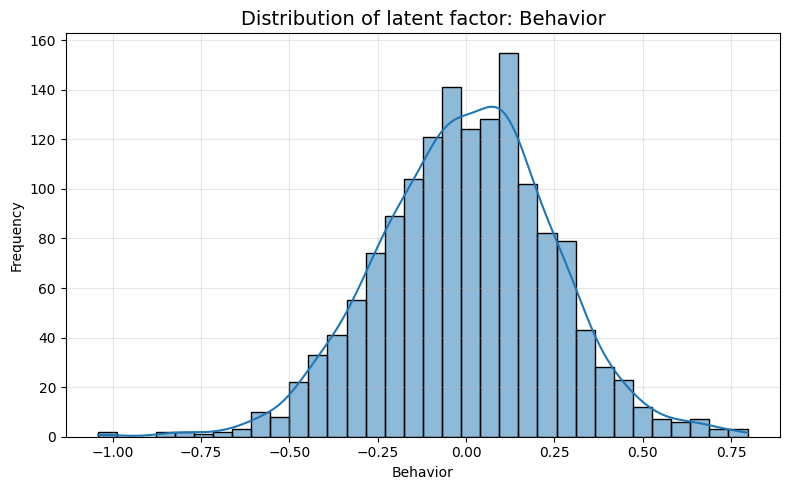

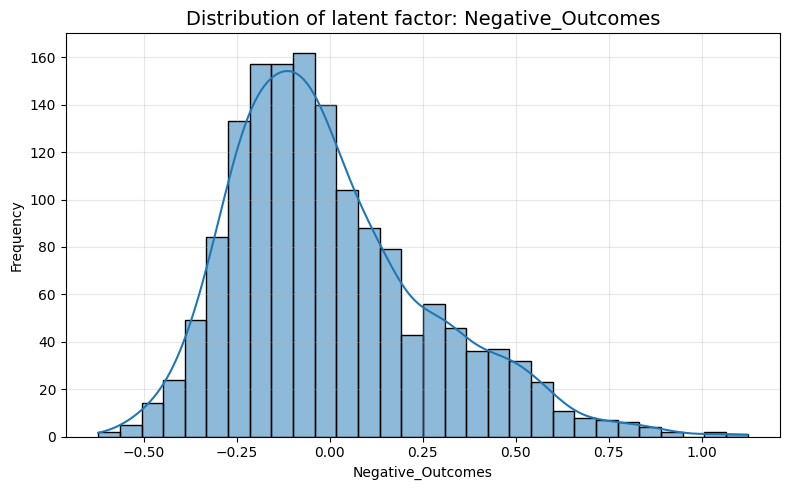

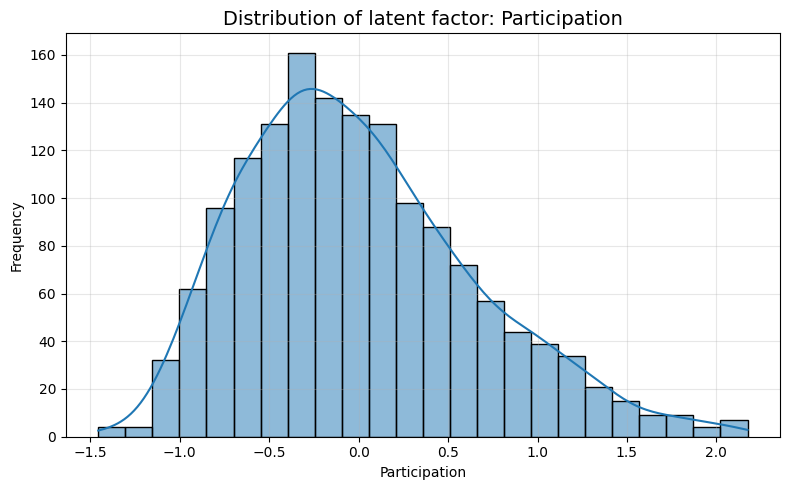

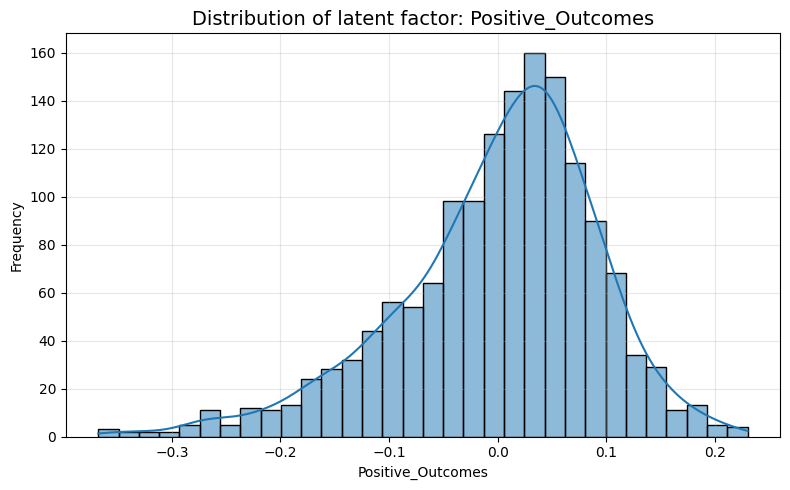

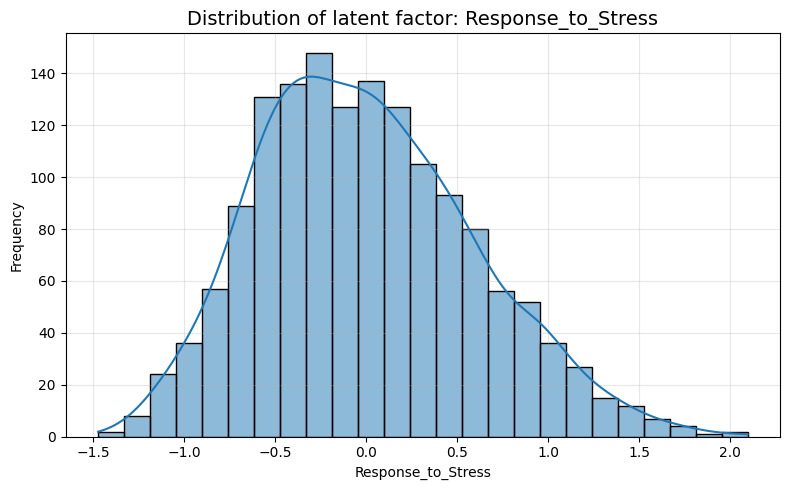

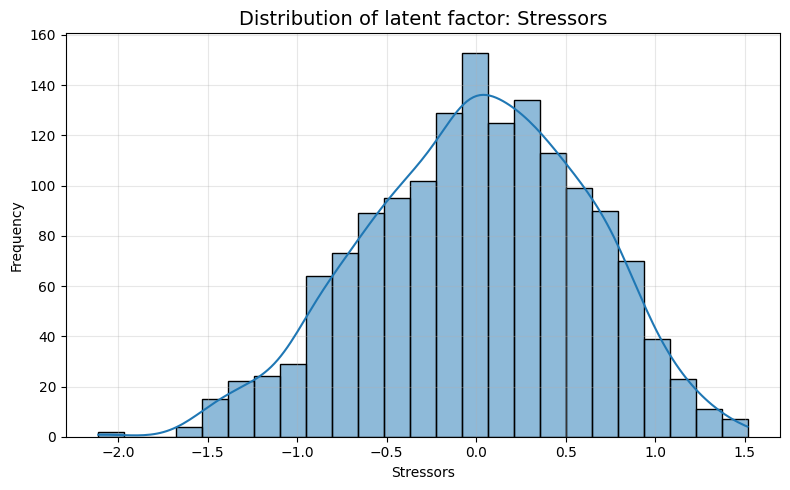

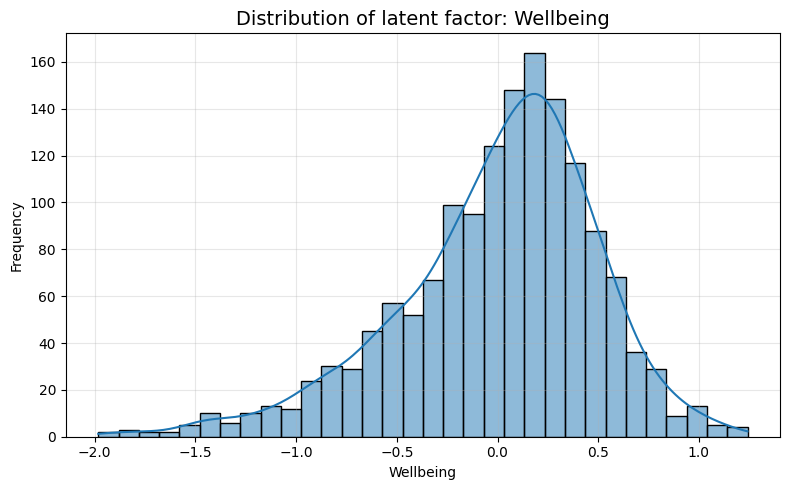

In [19]:
# Plot histogram for each latent variable
for col in latent_scores.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(latent_scores[col], kde=True)
    plt.title(f"Distribution of latent factor: {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

### Correlation matrix

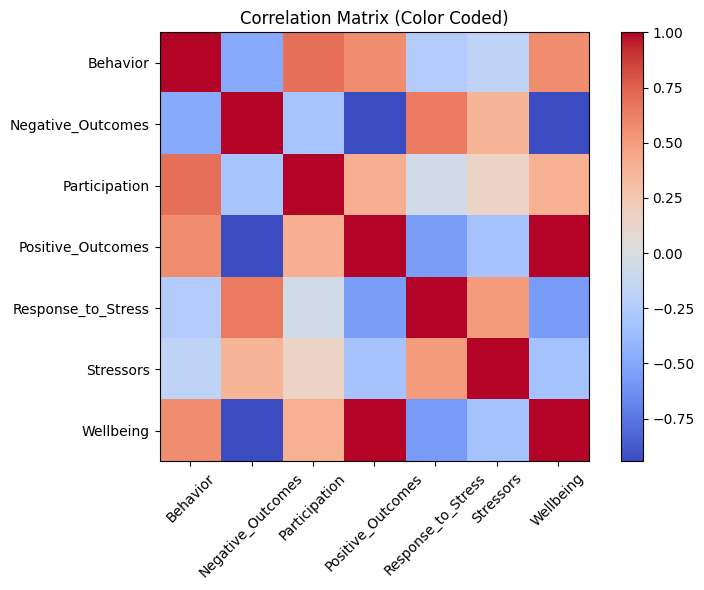

In [20]:
corr_matrix = latent_scores.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, interpolation='nearest', cmap='coolwarm')
plt.title("Correlation Matrix (Color Coded)")
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.tight_layout()
plt.show()

# print(corr_matrix)

### Calculate fit indices

In [21]:
stats = calc_stats(model)

print("=== Model Fit Statistics ===")
print(stats.T)

=== Model Fit Statistics ===
                      Value
DoF             1068.000000
DoF Baseline    1128.000000
chi2            9440.387878
chi2 p-value       0.000000
chi2 Baseline  29533.112534
CFI                0.705251
GFI                0.680346
AGFI               0.662388
NFI                0.680346
TLI                0.688692
RMSEA              0.072029
AIC              203.512714
BIC              778.201079
LogLik             6.243643


### Create and save the path diagram

In [22]:
g = semplot(model, "pd3.png")

### Extract model coefficients

In [23]:
coefficients = model.inspect()
coefficients.to_csv("model_coefficients.csv")
coefficients.to_excel("model_coefficients.xlsx")

In [24]:
def pretty_sem_latent_explicit(model):
    df = model.inspect().copy()

    # List of latent relationships as (lval, op, rval)
    wanted = [
        # covariances
        ("Response_to_Stress", "~~", "Wellbeing"),
        ("Interventions", "~~", "Participation"),
        ("Participation", "~~", "Behavior"),

        # regressions
        ("Response_to_Stress", "~",  "Stressors"),
        ("Response_to_Stress", "~",  "Behavior"),
        ("Wellbeing",          "~",  "Stressors"),
        ("Wellbeing",          "~",  "Interventions"),
        ("Wellbeing",          "~",  "Participation"),
        ("Wellbeing",          "~",  "Behavior"),
        ("Negative_Outcomes",  "~",  "Response_to_Stress"),
        ("Negative_Outcomes",  "~",  "Wellbeing"),
        ("Positive_Outcomes",  "~",  "Wellbeing"),
    ]

    wanted_df = pd.DataFrame(wanted, columns=["lval", "op", "rval"])

    # Inner join to keep only those rows
    df = df.merge(wanted_df, on=["lval", "op", "rval"], how="inner")

    # Label type + from/to
    df["Type"] = df["op"].map({"~": "Regression", "~~": "Covariance"})
    df["From"] = df["lval"]
    df["To"]   = df["rval"]

    # Clean p-values (handles "<0.001")
    p_clean = df["p-value"].astype(str).str.replace("<", "", regex=False)
    df["p_value"] = pd.to_numeric(p_clean, errors="coerce")

    # Significance stars
    def stars(p):
        if pd.isna(p): return ""
        if p < 0.001: return "***"
        if p < 0.01:  return "**"
        if p < 0.05:  return "*"
        if p < 0.10:  return "."
        return ""

    df["Sig"] = df["p_value"].apply(stars)

    # Numeric & rounded
    for col in ["Estimate", "Std. Err", "z-value", "p_value"]:
        df[col] = pd.to_numeric(df[col], errors="coerce").round(4)

    # Final table
    nice = df[[
        "Type", "From", "To",
        "Estimate", "Std. Err", "z-value", "p_value", "Sig"
    ]].copy()

    nice = nice.rename(columns={"Std. Err": "Std_Err"})

    return nice

latent_table = pretty_sem_latent_explicit(model)
latent_table   # last line in the cell → shows a nice table

,Type,From,To,Estimate,Std_Err,z-value,p_value,Sig
0,Regression,Response_to_Stress,Stressors,0.4602,0.0355,12.9620,0.0,***
1,Regression,Wellbeing,Stressors,-0.2886,0.0278,-10.3660,0.0,***
2,Regression,Wellbeing,Participation,0.2976,0.0256,11.6096,0.0,***
3,Regression,Negative_Outcomes,Response_to_Stress,0.0820,0.0186,4.4123,0.0,***
4,Regression,Negative_Outcomes,Wellbeing,-0.2817,0.0231,-12.2054,0.0,***
5,Regression,Positive_Outcomes,Wellbeing,0.1868,0.0263,7.1051,0.0,***
6,Covariance,Response_to_Stress,Wellbeing,-0.1242,0.0106,-11.7205,0.0,***
